<h1 style=" text-align:center; color:Blue; font-size:40px; display: block;"> <u><b><i>Reddit Vaccine Myths</i></b></u> </h1>

<p style="text-align:center; ">
<img src="https://www.statnews.com/wp-content/uploads/2020/03/AdobeStock_270886213.jpeg
" style='width: 800px;'>
</p>


<h2 style=" text-align:center; color:Blue; font-size:40px; display: block;"> <u><b><i>About The Dataset</i></b></u> </h1>


**Data contains both posts and comments.
Both posts and comments contains the following fields:**

**1. title - relevant for posts**

**2. score - relevant for posts - based on impact, number of**

**3. id - unique id for posts/comments**

**4. url - relevant for posts - url of post thread**

**5. commns_num - relevant for post - number of comments to this post**

**6. created - date of creation**

**7. body - relevant for posts/comments - text of the post or comment**

**8. timestamp - timestamp**


# **1. Modules**

In [1]:
!pip install spacytextblob==0.1.7
import numpy as np 
import pandas as pd 
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.style as style


#Ignoring The Warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# **2. Loading The Data**

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

vaccine= pd.read_csv('/kaggle/input/reddit-vaccine-myths/reddit_vm.csv')
vaccine.head(5)

/kaggle/input/reddit-vaccine-myths/reddit_vm.csv


,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


# **3. Analyzing The Data**

### 3.1 Shape Of DataFrame

In [3]:
print(f'The number of rows are {vaccine.shape[0] } and the number of columns are {vaccine.shape[1]}')


The number of rows are 1510 and the number of columns are 8


### 3.2 Describing the attributes

In [4]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1510 non-null   object 
 1   score      1510 non-null   int64  
 2   id         1510 non-null   object 
 3   url        452 non-null    object 
 4   comms_num  1510 non-null   int64  
 5   created    1510 non-null   float64
 6   body       1144 non-null   object 
 7   timestamp  1510 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 94.5+ KB


> **Important Findings:**
> * 1 column of type float.
> * 2 column of type int.
> * 5 columns of type object.

### 3.3 Finding All The Categorical And Covariate Columns

In [5]:
categorical_col, covariate_val=[],[]

for i in vaccine.columns:
    
    if vaccine[i].dtype == 'object':
        categorical_col.append(i)
    else:
        covariate_val.append(i)
        
print('The categorical features are :')
print()
for i in range(len(categorical_col)):
    print(f'{i+1}. {categorical_col[i]}')
        
print()
print('The covariate features are :')
print()
for i in range(len(covariate_val)):
    print(f'{i+1}. {covariate_val[i]}')
        
print()


The categorical features are :

1. title
2. id
3. url
4. body
5. timestamp

The covariate features are :

1. score
2. comms_num
3. created



### 3.4 Checking For Duplicate Rows



In [6]:
vaccine[vaccine.duplicated()]


,title,score,id,url,comms_num,created,body,timestamp


> **Important Findings:**
> No duplicate rows found.

### 3.5 Checking Statistical Data



In [7]:
vaccine.describe()

,score,comms_num,created
count,1510.000000,1510.000000,1.510000e+03
mean,3.764901,1.906623,1.542315e+09
std,30.831524,16.602391,7.018516e+07
min,-12.000000,0.000000,1.389624e+09
25%,1.000000,0.000000,1.553892e+09
50%,1.000000,0.000000,1.568622e+09
75%,3.000000,1.000000,1.580719e+09
max,1188.000000,596.000000,1.619490e+09


### 3.6 Checking Null Values

In [8]:
null_values=vaccine.isnull().sum()/len(vaccine)
for i in range(len(null_values.index)):
    print("Column",null_values.index[i],"has ",null_values[i]*100,"% null values")

Column title has  0.0 % null values
Column score has  0.0 % null values
Column id has  0.0 % null values
Column url has  70.06622516556291 % null values
Column comms_num has  0.0 % null values
Column created has  0.0 % null values
Column body has  24.23841059602649 % null values
Column timestamp has  0.0 % null values


> **Important Findings:**
> 1. Columns **url** and **body** have null values. 
> 2. Since column url has more than 30% null values. Therefore, we can drop it.

### 3.7 Creating A Column Year From Timestamp

# 4. Data Visualizations

In [9]:
vaccine['year']=pd.DatetimeIndex(vaccine['timestamp']).year
vaccine['month']=pd.DatetimeIndex(vaccine['timestamp']).month
vaccine.head(5)


,title,score,id,url,comms_num,created,body,timestamp,year,month
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45,2021,2
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07,2021,2
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08,2021,2
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13,2021,2
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28,2021,2


### 4.1 Plotting Pearson Correlation

<AxesSubplot:>

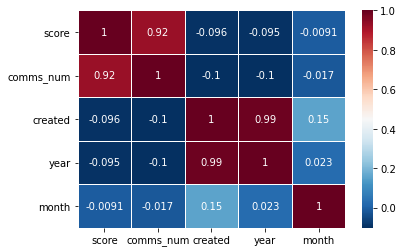

In [10]:
pearsoncorrelation = vaccine.corr(method='pearson')
sns.heatmap(pearsoncorrelation, 
            xticklabels=pearsoncorrelation.columns,
            yticklabels=pearsoncorrelation.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

> **Important Findings:**
> * A correlation of 0.92 is present betweem comms_num and score. So, one of these columns can be dropped.

### 4.2 Plotting The Null Values With HeatMap

<AxesSubplot:>

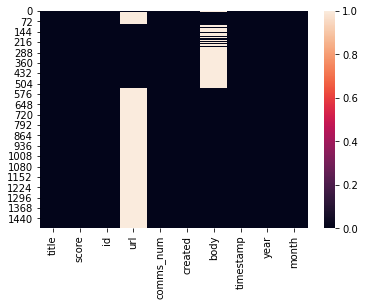

In [11]:
sns.heatmap(vaccine.isnull())


> **Important Findings:**
> * The heatmap shows that highest null values are present in url, followed by body.

### 4.3 KdePlot For comms_num

<AxesSubplot:xlabel='comms_num', ylabel='Density'>

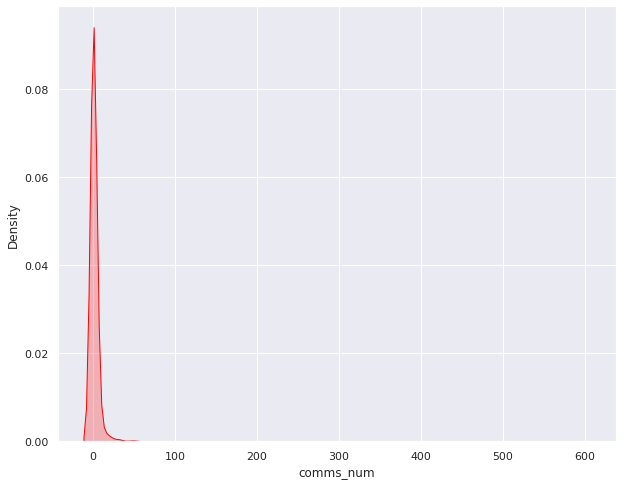

In [12]:
sns.set(rc={'figure.figsize':(10,8)})
sns.kdeplot(vaccine['comms_num'],color='red',shade = True, )

### 4.4 Number Of Titles Published According to Year

<AxesSubplot:xlabel='year', ylabel='count'>

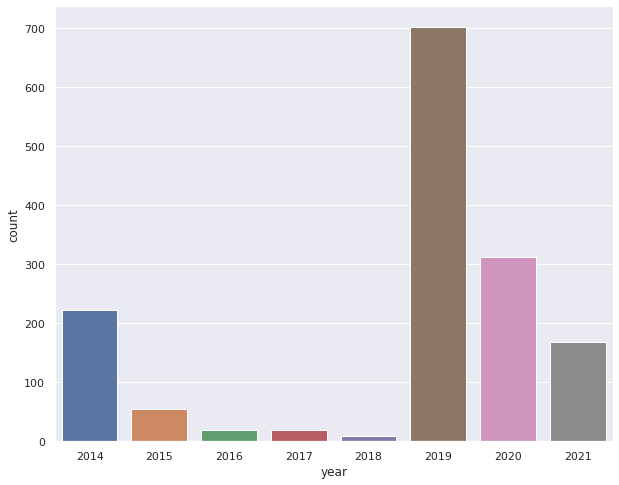

In [13]:
sns.countplot(data=vaccine,x='year')

> **Important Findings:**
> * Highest number of articles were published in year 2019.
> * Lowest number of articles were published in year 2018.

### 4.5 Number Of Titles Published According To Month And Year

In [14]:
x=pd.DataFrame()
x['Titles Published According To Month and Year']=(vaccine.groupby(by=['year','month']).agg('count'))['title']
x=x.style.set_properties(**{'background-color': 'yellow'}, subset=['Titles Published According To Month and Year'])
x

### 4.6 Number Of Titles Published According To Month And Year

<AxesSubplot:xlabel='month', ylabel='count'>

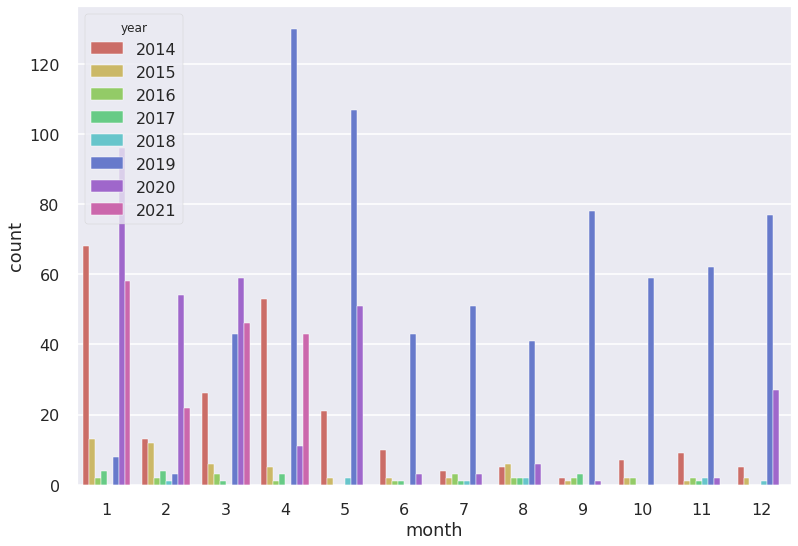

In [15]:
style.use('seaborn-poster') 
sns.countplot(data=vaccine, x='month',palette = 'hls',hue='year')


> **Important Findings:**
> * Highest number of articles were published in the month of January.
> * Lowest number of articles were published in the month of June.

### 4.7 PairPlot

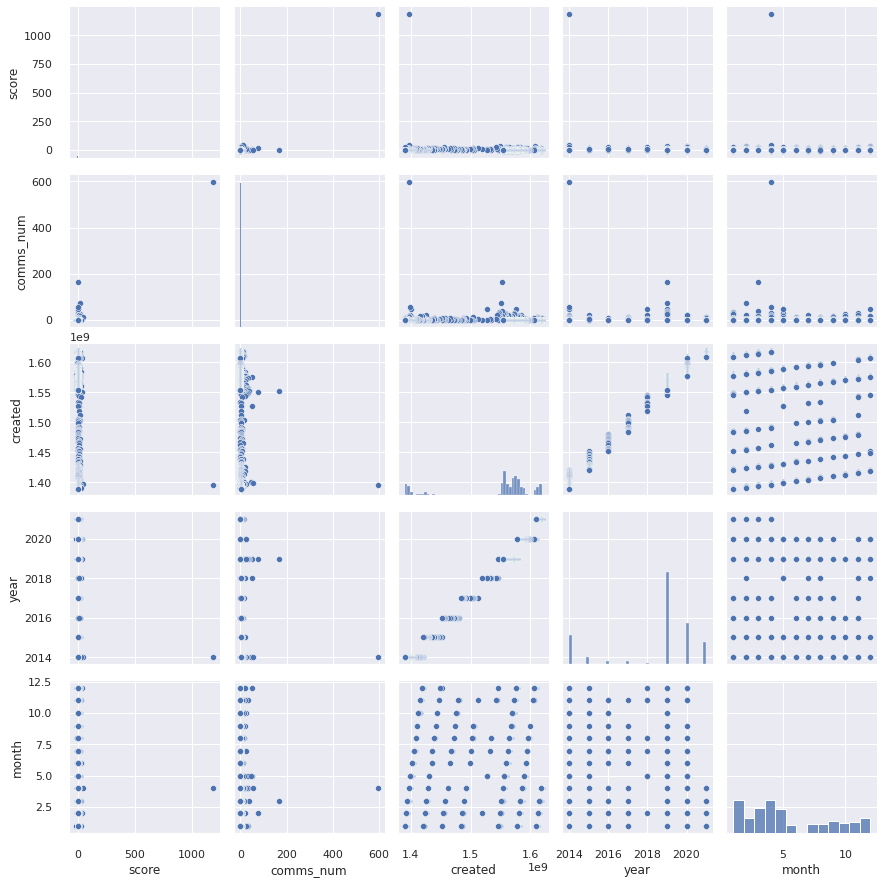

In [16]:
sns.set(rc={'figure.figsize':(15,22)})

sns.pairplot(vaccine)


# 5. Data PreProcessing

### 5.1 Dropping Columns With High Correlation And Null Values 

In [17]:
vaccine.drop(columns=['comms_num','id','url','created','timestamp'], inplace=True)
vaccine.head()

,title,score,body,year,month
0,Health Canada approves AstraZeneca COVID-19 va...,7,NaN,2021,2
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,NaN,2021,2
2,Coronavirus variants could fuel Canada's third...,6,NaN,2021,2
3,Canadian government to extend COVID-19 emergen...,1,NaN,2021,2
4,Canada: Pfizer is 'extremely committed' to mee...,6,NaN,2021,2


> Important points:
> * comms_num dropped because highly correlated to score.
> * id and created dropped because not important.
> * timestamp dropped because we have already extracted year and month from it.
> * url dropped because contains high number of null values.

### 5.2 LowerCase The Textual Columns

In [18]:
#Lowercase the text columns
vaccine['title'] = vaccine['title'].astype(str)
vaccine['body'] = vaccine['body'].astype(str)


vaccine['title'] = vaccine['title'].apply(lambda word: " ".join(word.lower() for word in word.split()))
vaccine['body'] = vaccine['body'].apply(lambda word: " ".join(word.lower() for word in word.split()))

vaccine

,title,score,body,year,month
0,health canada approves astrazeneca covid-19 va...,7,nan,2021,2
1,covid-19 in canada: 'vaccination passports' a ...,2,nan,2021,2
2,coronavirus variants could fuel canada's third...,6,nan,2021,2
3,canadian government to extend covid-19 emergen...,1,nan,2021,2
4,canada: pfizer is 'extremely committed' to mee...,6,nan,2021,2
...,...,...,...,...,...
1505,comment,2,"going into the blood can cause non-lethal, but...",2019,4
1506,comment,1,"good. but lets say your statement holds, which...",2019,4
1507,comment,2,turns out hg is used to measure the pressure e...,2019,4
1508,comment,3,"i’m still looking for the hg in vaccines, but ...",2019,4


### 5.3 Removing The Stop Words

In [19]:
# Removing The StopWords
from nltk.corpus import stopwords


vaccine['title'] = vaccine['title'].apply(lambda word: " ".join(word for word in word.split() if x not in stopwords.words('english')))
vaccine['body'] = vaccine['body'].apply(lambda word: " ".join(word for word in word.split() if x not in stopwords.words('english')))
vaccine.head(5)

,title,score,body,year,month
0,health canada approves astrazeneca covid-19 va...,7,nan,2021,2
1,covid-19 in canada: 'vaccination passports' a ...,2,nan,2021,2
2,coronavirus variants could fuel canada's third...,6,nan,2021,2
3,canadian government to extend covid-19 emergen...,1,nan,2021,2
4,canada: pfizer is 'extremely committed' to mee...,6,nan,2021,2


### 5.4 Finding Sensitivity And Subjectivity For The Textual Columns

**Polarity:**
> For determining the polarity, a score of -0.05 we tag as negative and anything above 0.05 we tag as positive. Anything in between inclusively, we tag as neutral Its range lies between [-1,1].

**Subjectivity:**
> * Generally refers to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].
> * Closer to 0 means its factual, and closer to 1 means its a public opinion.

In [20]:
#Calculating the Polarity and Subjectivity
spaceit = spacy.load('en_core_web_sm')
stb = SpacyTextBlob()
spaceit.add_pipe(stb)
vaccine['title_subjectivity'] = vaccine['title'].apply(lambda x: spaceit(x)._.sentiment.subjectivity)
vaccine['title_polarity'] = vaccine['title'].apply(lambda x: spaceit(x)._.sentiment.polarity)
vaccine

vaccine['body_subjectivity'] = vaccine['body'].apply(lambda x: spaceit(x)._.sentiment.subjectivity)
vaccine['body_polarity'] = vaccine['body'].apply(lambda x: spaceit(x)._.sentiment.polarity)
vaccine.head(5)

,title,score,body,year,month,title_subjectivity,title_polarity,body_subjectivity,body_polarity
0,health canada approves astrazeneca covid-19 va...,7,nan,2021,2,0.0,0.000,0.0,0.0
1,covid-19 in canada: 'vaccination passports' a ...,2,nan,2021,2,0.4,0.100,0.0,0.0
2,coronavirus variants could fuel canada's third...,6,nan,2021,2,0.0,0.000,0.0,0.0
3,canadian government to extend covid-19 emergen...,1,nan,2021,2,0.0,0.000,0.0,0.0
4,canada: pfizer is 'extremely committed' to mee...,6,nan,2021,2,1.0,-0.125,0.0,0.0


### 5.5 Checking Polarity For Column Body

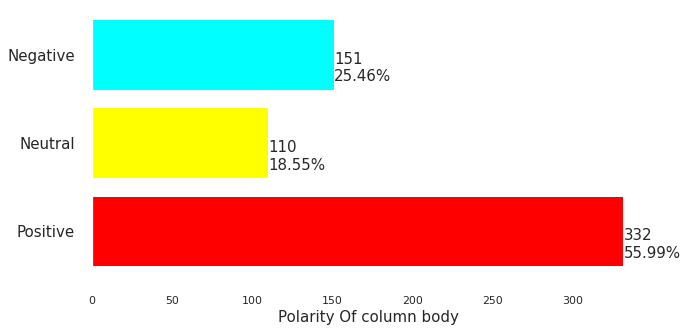

In [21]:
bp=pd.DataFrame()
bp['positive']=vaccine['body_polarity'].apply(lambda x : x if(x > 0) else None)
bp['negative']=vaccine['body_polarity'].apply(lambda x:  x if(x<=-0.05) else None)
bp['neutral']=vaccine['body_polarity'].apply(lambda x: x if(x>-0.05 and x<=.05) else None)
bp

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

ax = fig.add_subplot(111)


counts = [len((bp['positive']).value_counts()),len(bp['neutral'].value_counts()),len((bp['negative']).value_counts())]

percents = [100*x/sum(counts) for x in counts]

y_ax = ('Positive','Neutral','Negative')
y_tick = np.arange(len(y_ax))

ax.barh(range(len(counts)), counts, align = "center", color = ['Red', 'yellow', 'cyan'])
ax.set_yticks(y_tick)
ax.set_yticklabels(y_ax, size = 15)
ax.set_facecolor('xkcd:white')
plt.xlabel('Polarity Of column body ', size=15)



for i, y in enumerate(ax.patches):
    label_per = percents[i]
    ax.text(y.get_width()+.09, y.get_y()+.3, str(round((y.get_width()), 1)), fontsize=15)
    
    ax.text(y.get_width()+.09, y.get_y()+.1, str(f'{round((label_per), 2)}%'), fontsize=15)

sns.despine()
plt.show();



> **Important point:**
> 1. Analysis of polarity shows 56% examples are positive.

### 5.6 Body Sentiment Polarity Vs Subjectivity

In [22]:
vaccine['Body_Sentiment_Value']=vaccine['body_polarity'].apply(lambda x : 'Neutral' if(x>-0.05 and x<=.05) else ('Negative' if(x<=-0.05) else 'Positive'))


fig = px.scatter(vaccine, x="body_polarity", y="body_subjectivity", color="Body_Sentiment_Value",)
fig.update_layout(legend = dict(bgcolor = 'pink'))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### 5.7 Checking Polarity For Column Title

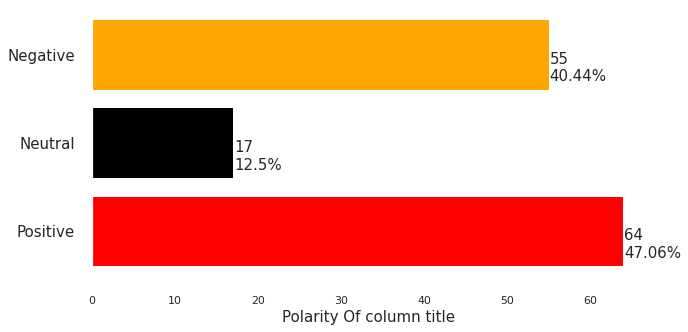

In [23]:
tp=pd.DataFrame()
tp['positive']=vaccine['title_polarity'].apply(lambda x : x if(x > 0.05) else None)
tp['negative']=vaccine['title_polarity'].apply(lambda x:  x if(x<=-0.05) else None)
tp['neutral']=vaccine['title_polarity'].apply(lambda x: x if(x>-0.05 and x<=.05) else None)
tp

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

ax = fig.add_subplot(111)

counts = [len((tp['positive']).value_counts()),len(tp['neutral'].value_counts()),len((tp['negative']).value_counts())]

percents = [100*x/sum(counts) for x in counts]

y_ax = ('Positive','Neutral','Negative')
y_tick = np.arange(len(y_ax))

ax.barh(range(len(counts)), counts, align = "center", color = ['red', 'black', 'orange'])
ax.set_yticks(y_tick)
ax.set_yticklabels(y_ax, size = 15)
ax.set_facecolor('xkcd:white')

plt.xlabel('Polarity Of column title ', size=15)



for i, y in enumerate(ax.patches):
    label_per = percents[i]
    ax.text(y.get_width()+.09, y.get_y()+.3, str(round((y.get_width()), 1)), fontsize=15)
    
    ax.text(y.get_width()+.09, y.get_y()+.1, str(f'{round((label_per), 2)}%'), fontsize=15)

sns.despine()
plt.show()

**Important points:**
> * nearly 51% titles are postive.

### 5.8 Title Sentiment Polarity Vs Subjectivity

In [24]:
vaccine['Title_Sentiment_Value']=vaccine['title_polarity'].apply(lambda x : 'Neutral' if(x>-0.05 and x<=.05) else ('Negative' if(x<=-0.05) else 'Positive'))


fig = px.scatter(vaccine, x="title_polarity", y="title_subjectivity", color="Title_Sentiment_Value",)
fig.update_layout(legend = dict(bgcolor = 'yellow'))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### 5.9 Creating WordCloud For Positive Words

Length of Positive words in title and body are: 17156 and 6421


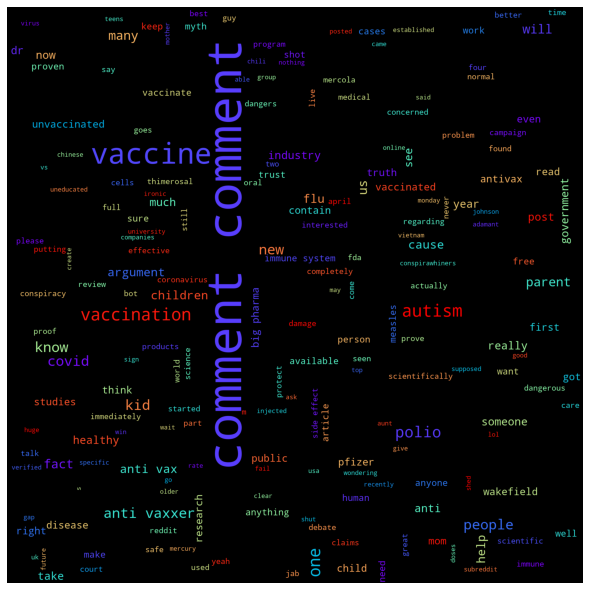

In [25]:
title_positive_polarity_words = ' '" ".join(x for x in (vaccine[vaccine['title_polarity']>0.05])['title'].astype(str))
body_positive_polarity_words = ' '" ".join(x for x in (vaccine[vaccine['body_polarity']>0.05])['title'].astype(str))
print('Length of Positive words in title and body are:',len(title_positive_polarity_words),'and',len(body_positive_polarity_words))
positive_words=''
positive_words=body_positive_polarity_words+title_positive_polarity_words


wordcloud=WordCloud(width = 2000, height = 2000, 
                background_color ='black', colormap = 'rainbow',
                min_font_size = 20).generate(positive_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### 5.10 Creating WordCloud For Negative Words

Length of negative words in title and body are: 11342 and 2999



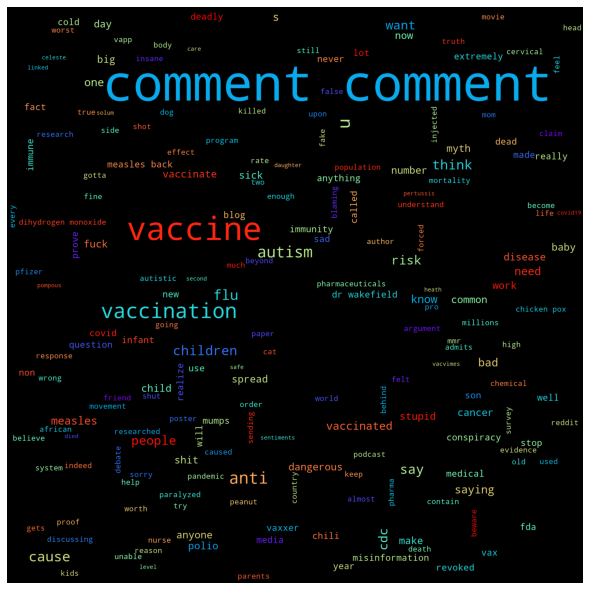

In [26]:
title_negative_polarity_words = ' '" ".join(x for x in (vaccine[vaccine['title_polarity']<-0.05])['title'].astype(str))
body_negative_polarity_words = ' '" ".join(x for x in (vaccine[vaccine['body_polarity']<-0.05])['title'].astype(str))
print('Length of negative words in title and body are:',len(title_negative_polarity_words),'and',len(body_negative_polarity_words))
negative_words=''
negative_words=body_negative_polarity_words+title_negative_polarity_words
print()


wordcloud=WordCloud(width = 2000, height = 2000, 
                background_color ='black', colormap = 'rainbow',
                min_font_size = 20).generate(negative_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()


# Notebook still in progress. Do share your feeedback and I will try to work on my mistakes. Thank you. :)